## Linear Regression Project Using Python

#### A simple linear regression tasks with only 2 variables.

## Libraries Used in this Project

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##  Importing Data from URL

In [6]:
url="http://bit.ly/w-data"
study = pd.read_csv(url)
study.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Extracting Dependent and Independent values

In [10]:
x=study.iloc[:, :-1].values
y=study.iloc[:, 1].values

## Visualising Data
#### When values are the same, the colors are lighter. So darker colors shows less connections between the data. 
#### Example; Hours on X-axis and Y-axis gives lighter color.
#### Note: Sometimes, the color scheme will be opposite in occurence. 

<AxesSubplot:>

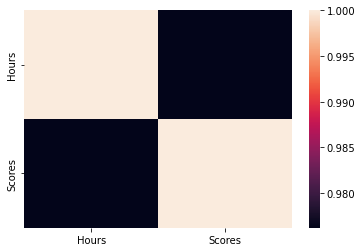

In [33]:
sns.heatmap(study.corr())

## Splitting the Dataset into the Training set and Test set

In [34]:
#test size = 20% and train set = 80%
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,random_state= 0)

In [36]:
#y_test

array([20, 27, 69, 30, 62], dtype=int64)

## Modelling

In [15]:
#creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Getting the Prediction

In [38]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Checking Behind the Scene

In [19]:
#coefficeient calc
#what goes on behind the scene
print(regressor.coef_)

[9.91065648]


In [18]:
#calculating the intercept
print(regressor.intercept_)

2.018160041434683


## Plotting the Regression Line(Visualisation)

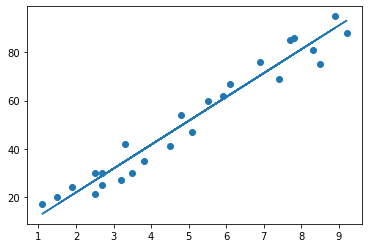

In [24]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Actual Value and Predicted Value

In [28]:
act = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
act

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating the Model

In [42]:
# R squared value is 0.945 which is 94.5% it shows that the model is not perfect and the values do not match
# MSE is 4.18 shows that the model is not perfect.
# Perfect R squared value and MSE is 1 and 0 respectively

from sklearn import metrics
r2_score=r2_score(y_test, y_pred)
mse=metrics.mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2_score) 
print('Mean Square Error:', mse) 

R2 Score: 0.9454906892105356
Mean Square Error: 4.183859899002975


### The predicted score if a student studies 9.25 hours per day

In [31]:
#You can also test with your own data
hours = 9.25
own_pred = regressor.predict(np.array([9.25]).reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
